In [1]:
!pip install tensorflow==2.18.0

In [2]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
training_datagenerator=ImageDataGenerator(rescale=1./255,horizontal_flip=True, 
vertical_flip=True,shear_range=0.2, 
zoom_range=0.2,width_shift_range=0.2, 
height_shift_range=0.2,validation_split=0.1)

In [ ]:
batch_size=16 
train=training_datagenerator.flow_from_directory(r'G:\\FireFly\\forest_fire\\Training and Validation',target_size=(256,  256),color_mode='rgb', class_mode='binary',batch_size=batch_size,subset='training') 
validation=training_datagenerator.flow_from_directory(r'G:\\FireFly\\forest_fire\\Training and Validation' ,target_size=(256,  256),color_mode='rgb', class_mode='binary',batch_size=batch_size,subset='validation')

Found 1474 images belonging to 2 classes.
Found 162 images belonging to 2 classes.


In [5]:
cnn=tf.keras.Sequential() 
#layer1 
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same', 
activation='relu',input_shape=[256,256,3])) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2)) 
#layer2 
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu')) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2)) 
#layer3 
cnn.add(tf.keras.layers.Conv2D(filters=124,kernel_size=3,padding='same',activation='relu')) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2)) 
#layer4 
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu')) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2)) 
#flatten 
cnn.add(tf.keras.layers.Flatten()) 
#fully connected layer 
cnn.add(tf.keras.layers.Dense(units=128,activation='relu')) 
#outputlayer 
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

c:\Users\Anushka Adak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 124)    │        71,548 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 124)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       285,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,765,757 (33.44 MB)

 Trainable params: 8,765,757 (33.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(r'G:\\FireFly\\model\\dpmodel.keras', monitor='val_loss', save_best_only=True, verbose=1)
callbacks = [checkpoint]


In [8]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy']) 
cnn.fit(train,validation_data=validation,epochs=1,steps_per_epoch=train.samples//batch_size, validation_steps=validation.samples//batch_size, callbacks=callbacks) 

c:\Users\Anushka Adak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - accuracy: 0.7458 - loss: 0.5719

c:\Users\Anushka Adak\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 0.50005, saving model to C:\Users\Anushka Adak\OneDrive\Desktop\FireDetectionAndLocalization-main\model\dpmodel.keras
92/92 ━━━━━━━━━━━━━━━━━━━━ 73s 756ms/step - accuracy: 0.7471 - loss: 0.5694 - val_accuracy: 0.8625 - val_loss: 0.5000


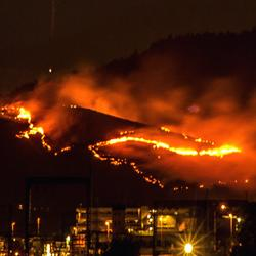

In [ ]:
from tensorflow.keras.preprocessing import image 
import numpy as np 
test_image=image.load_img(r'G:\\FireFly\\forest_fire\\Testing\\fire\\abc172.jpg',target_size=(256,256)) 
test_image

In [10]:
test_image=image.img_to_array(test_image) 
test_image

array([[[ 35.,  18.,   8.],
        [ 35.,  18.,   8.],
        [ 35.,  18.,   8.],
        ...,
        [ 37.,  19.,   7.],
        [ 36.,  18.,   6.],
        [ 36.,  18.,   6.]],

       [[ 35.,  18.,   8.],
        [ 35.,  18.,   8.],
        [ 35.,  18.,   8.],
        ...,
        [ 37.,  19.,   7.],
        [ 37.,  19.,   7.],
        [ 37.,  19.,   7.]],

       [[ 35.,  18.,   8.],
        [ 35.,  18.,   8.],
        [ 35.,  18.,   8.],
        ...,
        [ 37.,  19.,   7.],
        [ 37.,  19.,   7.],
        [ 37.,  19.,   7.]],

       ...,

       [[137.,  63.,   0.],
        [202., 130.,  45.],
        [147.,  74.,   0.],
        ...,
        [  8.,   6.,   9.],
        [  7.,   5.,   8.],
        [  7.,   5.,   8.]],

       [[204., 127.,  19.],
        [255., 188.,  83.],
        [224., 148.,  50.],
        ...,
        [  5.,   3.,   6.],
        [  6.,   4.,   7.],
        [  6.,   4.,   7.]],

       [[216., 139.,  21.],
        [234., 157.,  43.],
        [175.,  

In [11]:
test_image=np.expand_dims(test_image,axis=0) 
test_image

array([[[[ 35.,  18.,   8.],
         [ 35.,  18.,   8.],
         [ 35.,  18.,   8.],
         ...,
         [ 37.,  19.,   7.],
         [ 36.,  18.,   6.],
         [ 36.,  18.,   6.]],

        [[ 35.,  18.,   8.],
         [ 35.,  18.,   8.],
         [ 35.,  18.,   8.],
         ...,
         [ 37.,  19.,   7.],
         [ 37.,  19.,   7.],
         [ 37.,  19.,   7.]],

        [[ 35.,  18.,   8.],
         [ 35.,  18.,   8.],
         [ 35.,  18.,   8.],
         ...,
         [ 37.,  19.,   7.],
         [ 37.,  19.,   7.],
         [ 37.,  19.,   7.]],

        ...,

        [[137.,  63.,   0.],
         [202., 130.,  45.],
         [147.,  74.,   0.],
         ...,
         [  8.,   6.,   9.],
         [  7.,   5.,   8.],
         [  7.,   5.,   8.]],

        [[204., 127.,  19.],
         [255., 188.,  83.],
         [224., 148.,  50.],
         ...,
         [  5.,   3.,   6.],
         [  6.,   4.,   7.],
         [  6.,   4.,   7.]],

        [[216., 139.,  21.],
       

In [12]:
result=(cnn.predict(test_image) > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [13]:
result[0]

array([0], dtype=int32)

In [14]:
if result[0]==0: 
    print("fire") 
else: 
    print("no fire") 

fire


In [15]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import winsound 

In [16]:
def sound_alarm():
    duration = 1000  # milliseconds
    freq = 15000  # Hz
    winsound.Beep(freq, duration)

In [17]:
def send_email_alert():
    sender_email = "anny14062110@gmail.com"
    receiver_email = "anushka.panda3105@gmail.com"
    password = "vcdgnodeeklwtfsq"

    subject = "Fire Alert!"
    body = "Warning! A fire has been detected. Please check the surveillance footage immediately."

    # Setting up the MIME
    message = MIMEMultipart()
    message['From'] = sender_email
    message['To'] = receiver_email
    message['Subject'] = subject
    message.attach(MIMEText(body, 'plain'))

    # Sending the email
    try:
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()  # Secure the connection
            server.login(sender_email, password)
            server.send_message(message)
        print("Alert email sent successfully.")
    except Exception as e:
        print("Error sending email:", e)

    # Call these functions after fire is detected
    if result[0]==0:   # Replace with your actual fire detection condition
        print('aag lagi hai basti main')
        sound_alarm()
        send_email_alert()